# Import dependices and Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os
import joblib
import warnings
warnings.filterwarnings('ignore')
RANDOM_SEED = 2345

np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] =  str(RANDOM_SEED)

In [2]:
train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv')
test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv')

In [3]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [5]:
train['comment_text'].iloc[6]  # some really toxic comment 

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [6]:
train.iloc[6,2:]

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: object

In [7]:
len(train['comment_text'].max()), len(test['comment_text'].max())

(4521, 110)

In [8]:
train.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

# Preprocessing

In [9]:
from tensorflow.keras.layers import TextVectorization

In [10]:
X = train['comment_text']
y = train.iloc[:,2:]

In [11]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [12]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [13]:
MAX_FEATURES  = 200_000   # this is the size of the vocab

In [14]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=2000)
vectorizer

2022-05-25 07:01:14.246443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:01:14.366061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:01:14.366909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 07:01:14.368054: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
%%time
vectorizer.adapt(X.values)

2022-05-25 07:01:17.154097: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


CPU times: user 19.2 s, sys: 895 ms, total: 20.1 s
Wall time: 11.3 s


In [16]:
len(vectorizer.get_vocabulary())

200000

In [17]:
vectorized_text = vectorizer(X.values)
vectorized_text   

2022-05-25 07:01:36.464719: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2553136000 exceeds 10% of free system memory.


<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [18]:
vectorized_text.shape  

TensorShape([159571, 2000])

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.shuffle(13000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [20]:
train_df = dataset.take(int(len(dataset)*.7))
val_df = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test_df = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [21]:
train_df = train_df.cache()
val_df = val_df.cache()
test_df = test_df.cache()

# Model Building and Training

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Input

In [23]:
inputs = Input(shape = (None,))
# learns embbeddings in 32 dim space for each word or 
# you can provide the model already learned embeddings like word2vec or glove embeddings
x = Embedding(MAX_FEATURES+1, 32)(inputs)
# bidirectional layer wrapping lstm layer.
x = Bidirectional(LSTM(64, activation='tanh'))(x)
# Dense layer
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(6, activation='sigmoid')(x)

# this type of keras model is called functional model
model = Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 32)          6400032   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49664     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774   

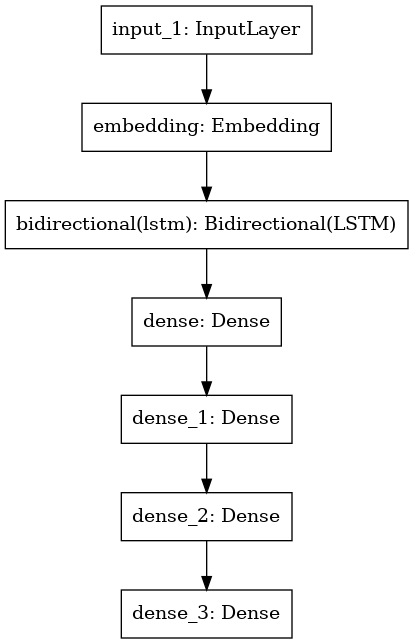

In [24]:
# visual reprsentation of the model...
from tensorflow.keras.utils import plot_model
plot_model(model)

In [25]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam())

In [26]:
history = model.fit(train_df, epochs=5, validation_data=val_df)      # lstms converge really slow..

2022-05-25 07:01:40.828678: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2553136000 exceeds 10% of free system memory.
2022-05-25 07:01:42.604926: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2553136000 exceeds 10% of free system memory.


Epoch 1/5


2022-05-25 07:01:48.242660: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


6981/6981 [==============================] - ETA: 0s - loss: 0.0627

2022-05-25 07:16:32.931018: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2553136000 exceeds 10% of free system memory.
2022-05-25 07:16:34.728273: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2553136000 exceeds 10% of free system memory.


6981/6981 [==============================] - 997s 142ms/step - loss: 0.0627 - val_loss: 0.0496
Epoch 2/5
6981/6981 [==============================] - 987s 141ms/step - loss: 0.0444 - val_loss: 0.0473
Epoch 3/5
6981/6981 [==============================] - 986s 141ms/step - loss: 0.0380 - val_loss: 0.0492
Epoch 4/5
6981/6981 [==============================] - 984s 141ms/step - loss: 0.0331 - val_loss: 0.0534
Epoch 5/5
6981/6981 [==============================] - 986s 141ms/step - loss: 0.0289 - val_loss: 0.0610


In [27]:
# save the model
model.save('toxicity_clf_model.h5')

<Figure size 576x360 with 0 Axes>

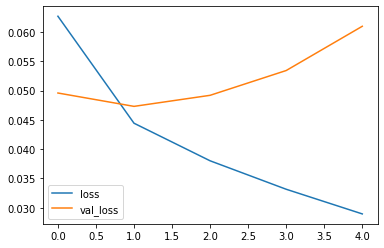

In [28]:
# plot training and validation loss
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [30]:
for batch in test_df.as_numpy_iterator():
    X, y = batch
    preds = model.predict(X)
    
    y = y.flatten()
    preds = preds.flatten()
    
    pre.update_state(y, preds)
    re.update_state(y, preds)
    acc.update_state(y, preds)    

In [31]:
print('Acc:', acc.result().numpy(), 'Re:',re.result().numpy(), 'Pre:', pre.result().numpy())

Acc: 0.44132397 Re: 0.7354692 Pre: 0.700324


In [32]:
# the model can be further trained or the architecture of the model can be modified to increase the classification accuracy.